In [1]:
import pandas as pd
import numpy as np
import warnings as wb
import matplotlib.pyplot as plt
import seaborn as sb
wb.filterwarnings("ignore")
rd = pd.read_csv("day.csv")
rd

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [2]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [3]:
(rd.isna().sum()/rd.shape[0])*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

<AxesSubplot:>

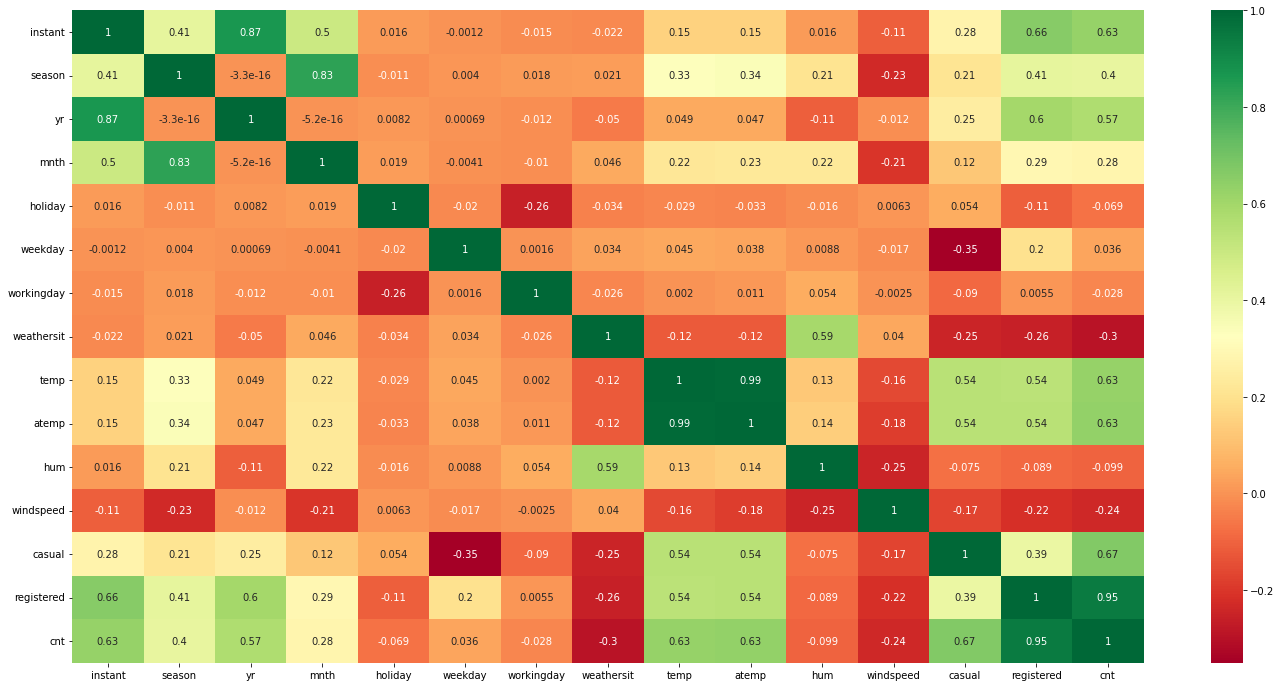

In [4]:
plt.figure(figsize=(24,12))
sb.heatmap(rd.corr(),cmap="RdYlGn",annot=True)

<AxesSubplot:xlabel='holiday', ylabel='Density'>

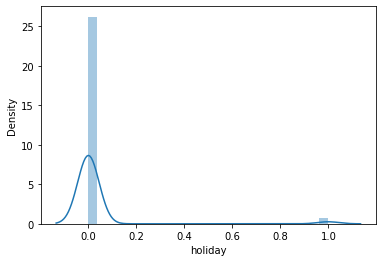

In [5]:
sb.distplot(rd.holiday)

In [6]:
rd.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
rd.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [8]:
d={1:"clear/sunny",2:"cloudy/foggy",3:"rainy/cloudy"}
rd.weathersit=rd.weathersit.apply(lambda x:d[x])

In [9]:
rd.weathersit.value_counts()

clear/sunny     463
cloudy/foggy    246
rainy/cloudy     21
Name: weathersit, dtype: int64

In [10]:
rd.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [11]:
pd.get_dummies(rd.weathersit,drop_first=True)

,cloudy/foggy,rainy/cloudy
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


In [12]:
rd.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,cloudy/foggy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,cloudy/foggy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,clear/sunny,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,clear/sunny,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,clear/sunny,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
rd.season.value_counts()
f={1:"winter",2:"summer",3:"spring",4:"fall"}
rd.season=rd.season.apply(lambda x:f[x])

In [14]:
ssd = pd.get_dummies(rd.season,drop_first=True)
rd.drop(columns=["season"],inplace=True)
rd=pd.concat([rd,ssd],axis=1)

In [15]:
rd.head(10)

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,1,01-01-2018,0,1,0,1,1,cloudy/foggy,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1
1,2,02-01-2018,0,1,0,2,1,cloudy/foggy,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1
2,3,03-01-2018,0,1,0,3,1,clear/sunny,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1
3,4,04-01-2018,0,1,0,4,1,clear/sunny,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1
4,5,05-01-2018,0,1,0,5,1,clear/sunny,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1
5,6,06-01-2018,0,1,0,6,0,clear/sunny,8.378268,11.66045,51.8261,6.000868,88,1518,1606,0,0,1
6,7,07-01-2018,0,1,0,0,0,cloudy/foggy,8.057402,10.44195,49.8696,11.304642,148,1362,1510,0,0,1
7,8,08-01-2018,0,1,0,1,1,cloudy/foggy,6.765000,8.11270,53.5833,17.875868,68,891,959,0,0,1
8,9,09-01-2018,0,1,0,2,1,clear/sunny,5.671653,5.80875,43.4167,24.250650,54,768,822,0,0,1
9,10,10-01-2018,0,1,0,3,1,clear/sunny,6.184153,7.54440,48.2917,14.958889,41,1280,1321,0,0,1


In [16]:
from sklearn.preprocessing import MinMaxScaler as scaler
from sklearn.model_selection import train_test_split
scale = scaler()


In [17]:
X=rd.copy()
Y=X.copy()
y=Y.pop("cnt")

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=45,test_size=0.4)

In [19]:
x_train.head(5)

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
474,475,20-04-2019,1,4,0,6,0,clear/sunny,21.593347,25.78875,69.4583,10.041357,1340,5950,7290,0,1,0
113,114,24-04-2018,0,4,0,2,1,cloudy/foggy,23.848347,27.58815,81.0833,12.875725,1710,2481,4191,0,1,0
347,348,14-12-2018,0,12,0,5,1,cloudy/foggy,13.017500,16.91810,66.3750,4.084206,178,3562,3740,0,0,0
132,133,13-05-2018,0,5,0,0,0,cloudy/foggy,21.012500,24.71500,86.3333,12.041575,692,3413,4105,0,1,0
50,51,20-02-2018,0,2,0,2,1,clear/sunny,11.693897,13.86650,40.7826,14.956745,639,1173,1812,0,0,1


In [20]:
X.pop("dteday")

0      01-01-2018
1      02-01-2018
2      03-01-2018
3      04-01-2018
4      05-01-2018
          ...    
725    27-12-2019
726    28-12-2019
727    29-12-2019
728    30-12-2019
729    31-12-2019
Name: dteday, Length: 730, dtype: object

In [21]:
x_train.pop("dteday")

474    20-04-2019
113    24-04-2018
347    14-12-2018
132    13-05-2018
50     20-02-2018
          ...    
725    27-12-2019
607    31-08-2019
544    29-06-2019
643    06-10-2019
414    19-02-2019
Name: dteday, Length: 438, dtype: object

In [22]:
x_train.head(5)

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
474,475,1,4,0,6,0,clear/sunny,21.593347,25.78875,69.4583,10.041357,1340,5950,7290,0,1,0
113,114,0,4,0,2,1,cloudy/foggy,23.848347,27.58815,81.0833,12.875725,1710,2481,4191,0,1,0
347,348,0,12,0,5,1,cloudy/foggy,13.017500,16.91810,66.3750,4.084206,178,3562,3740,0,0,0
132,133,0,5,0,0,0,cloudy/foggy,21.012500,24.71500,86.3333,12.041575,692,3413,4105,0,1,0
50,51,0,2,0,2,1,clear/sunny,11.693897,13.86650,40.7826,14.956745,639,1173,1812,0,0,1


In [23]:
col = ["instant", "weekday", "mnth", "temp", "atemp", "hum", "windspeed", "casual", "registered","cnt"]
X[col]=scale.fit_transform(X[col])

In [24]:
X

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,0.000000,0,0.0,0,0.166667,1,cloudy/foggy,0.355170,0.373517,0.828620,0.284606,0.096538,0.091539,0.110792,0,0,1
1,0.001372,0,0.0,0,0.333333,1,cloudy/foggy,0.379232,0.360541,0.715771,0.466215,0.037852,0.093849,0.089623,0,0,1
2,0.002743,0,0.0,0,0.500000,1,clear/sunny,0.171000,0.144830,0.449638,0.465740,0.034624,0.174560,0.152669,0,0,1
3,0.004115,0,0.0,0,0.666667,1,clear/sunny,0.175530,0.174649,0.607131,0.284297,0.031103,0.207046,0.177174,0,0,1
4,0.005487,0,0.0,0,0.833333,1,clear/sunny,0.209120,0.197158,0.449313,0.339143,0.023474,0.216286,0.181546,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0.994513,1,1.0,0,0.833333,1,cloudy/foggy,0.243025,0.193709,0.671380,0.675656,0.071890,0.266676,0.240681,0,0,1
726,0.995885,1,1.0,0,1.000000,0,cloudy/foggy,0.241986,0.230993,0.606684,0.274350,0.188380,0.350996,0.353543,0,0,1
727,0.997257,1,1.0,0,0.000000,0,cloudy/foggy,0.241986,0.214393,0.774208,0.210260,0.046068,0.167774,0.151749,0,0,1
728,0.998628,1,1.0,0,0.166667,1,clear/sunny,0.245101,0.200348,0.497001,0.676936,0.106221,0.203869,0.204096,0,0,1


In [25]:
x_train.pop("weathersit")

474     clear/sunny
113    cloudy/foggy
347    cloudy/foggy
132    cloudy/foggy
50      clear/sunny
           ...     
725    cloudy/foggy
607     clear/sunny
544     clear/sunny
643     clear/sunny
414    cloudy/foggy
Name: weathersit, Length: 438, dtype: object

In [26]:
X.pop("weathersit")

0      cloudy/foggy
1      cloudy/foggy
2       clear/sunny
3       clear/sunny
4       clear/sunny
           ...     
725    cloudy/foggy
726    cloudy/foggy
727    cloudy/foggy
728     clear/sunny
729    cloudy/foggy
Name: weathersit, Length: 730, dtype: object

In [27]:
Y=X.head(5)

In [28]:
X

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,0.000000,0,0.0,0,0.166667,1,0.355170,0.373517,0.828620,0.284606,0.096538,0.091539,0.110792,0,0,1
1,0.001372,0,0.0,0,0.333333,1,0.379232,0.360541,0.715771,0.466215,0.037852,0.093849,0.089623,0,0,1
2,0.002743,0,0.0,0,0.500000,1,0.171000,0.144830,0.449638,0.465740,0.034624,0.174560,0.152669,0,0,1
3,0.004115,0,0.0,0,0.666667,1,0.175530,0.174649,0.607131,0.284297,0.031103,0.207046,0.177174,0,0,1
4,0.005487,0,0.0,0,0.833333,1,0.209120,0.197158,0.449313,0.339143,0.023474,0.216286,0.181546,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0.994513,1,1.0,0,0.833333,1,0.243025,0.193709,0.671380,0.675656,0.071890,0.266676,0.240681,0,0,1
726,0.995885,1,1.0,0,1.000000,0,0.241986,0.230993,0.606684,0.274350,0.188380,0.350996,0.353543,0,0,1
727,0.997257,1,1.0,0,0.000000,0,0.241986,0.214393,0.774208,0.210260,0.046068,0.167774,0.151749,0,0,1
728,0.998628,1,1.0,0,0.166667,1,0.245101,0.200348,0.497001,0.676936,0.106221,0.203869,0.204096,0,0,1


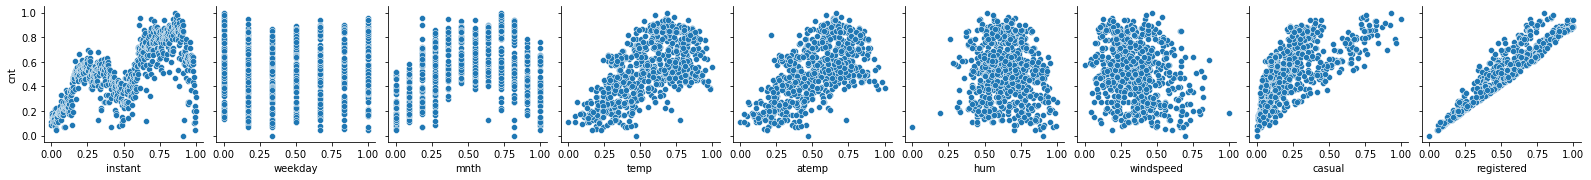

In [29]:
sb.pairplot(data=X,x_vars=["instant", "weekday", "mnth", "temp", "atemp", "hum", "windspeed", "casual", "registered"],y_vars='cnt')

In [30]:
import statsmodels.api as ap
from statsmodels.api import regression
from statsmodels.api import add_constant

In [31]:
x_train_sm=add_constant(x_train)
x_train_sm

,const,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
474,1.0,475,1,4,0,6,0,21.593347,25.78875,69.4583,10.041357,1340,5950,7290,0,1,0
113,1.0,114,0,4,0,2,1,23.848347,27.58815,81.0833,12.875725,1710,2481,4191,0,1,0
347,1.0,348,0,12,0,5,1,13.017500,16.91810,66.3750,4.084206,178,3562,3740,0,0,0
132,1.0,133,0,5,0,0,0,21.012500,24.71500,86.3333,12.041575,692,3413,4105,0,1,0
50,1.0,51,0,2,0,2,1,11.693897,13.86650,40.7826,14.956745,639,1173,1812,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1.0,726,1,12,0,5,1,10.420847,11.33210,65.2917,23.458911,247,1867,2114,0,0,1
607,1.0,608,1,8,0,6,0,31.330847,34.47000,58.7500,11.291711,1433,5917,7350,1,0,0
544,1.0,545,1,6,0,6,0,34.200847,39.33065,48.8750,11.082939,829,4634,5463,1,0,0
643,1.0,644,1,10,0,0,0,22.720847,26.92605,66.4167,17.957675,3031,4934,7965,0,0,0


In [32]:
linear_reg=ap.OLS(y_train,x_train_sm)
linear_reg=linear_reg.fit()
linear_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.078e+30
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        22:06:24   Log-Likelihood:                 10475.
No. Observations:                 438   AIC:                        -2.092e+04
Df Residuals:                     422   BIC:                        -2.085e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.052e-12   5.25e-12      0.200      0.841   -9.26e-12    1.14e-11
instant     1.199e-14   5.51e-14      0.218      0.828   -9.63e-14     1.2e-13
yr         -1.819e-12   2.02e-11     -0.090      0.928   -4.15e-11    3.79e-11
mnth       -2.416e-13    1.7e-12     -0.142      0.887   -3.58e-12     3.1e-12
holiday             0   2.84e-12          0      1.000   -5.59e-12    5.59e-12
weekday    -5.329e-15   2.98e-13     -0.018      0.986    -5.9e-13     5.8e-13
workingday  2.345e-13   1.12e-12      0.210      0.834   -1.96e-12    2.43e-12
temp       -2.949e-13   4.61e-13     -0.639      0.523    -1.2e-12    6.12e-13
atemp      -9.148e-14   4.03e-13     -0.227      0.820   -8.83e-13       7e-13
hum         3.997e-15   3.98e-14      0.100      0.920   -7.43e-14    8.23e-14
windspeed   1.092e-13   1.01e-13      1.086      0.278   -8.85e-14    3.07e-13
casual         0.3333    7.5e-16   4.44e+14      0.000       0.333       0.333
registered     0.3333   5.65e-16    5.9e+14      0.000       0.333       0.333
cnt            0.6667   4.15e-16   1.61e+15      0.000       0.667       0.667
spring        5.4e-13   2.24e-12      0.241      0.810   -3.86e-12    4.94e-12
summer     -8.527e-14   2.29e-12     -0.037      0.970   -4.58e-12    4.41e-12
winter     -1.521e-12   2.78e-12     -0.547      0.585   -6.98e-12    3.94e-12
==============================================================================
Omnibus:                       68.727   Durbin-Watson:                   0.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.085
Skew:                          -0.196   Prob(JB):                     7.17e-05
Kurtosis:                       2.055   Cond. No.                     1.27e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.1e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf

In [34]:
vif_data=pd.DataFrame()
vif_data["features"]=x_train_sm.columns
vif_data["VIF"]=[vf(x_train_sm.values,i) for i in range(x_train_sm.shape[1])]

In [35]:
vif_data

,features,VIF
0,const,117.464513
1,instant,577.521867
2,yr,434.678149
3,mnth,149.900590
4,holiday,1.138938
5,weekday,1.480720
6,workingday,1.133544
7,temp,53.593597
8,atemp,48.361539
9,hum,1.351639


In [36]:
x_train_sm.pop("atemp")
x_test.pop("atemp")

499    28.82020
647    25.15710
549    36.61685
656    26.89480
384    11.04790
         ...   
547    35.10190
267    28.63185
108    24.46290
392    16.31895
186    34.28165
Name: atemp, Length: 292, dtype: float64

In [37]:
vif_data=pd.DataFrame()
vif_data["features"]=x_train_sm.columns
vif_data["VIF"]=[vf(x_train_sm.values,i) for i in range(x_train_sm.shape[1])]

In [38]:
vif_data

,features,VIF
0,const,114.914614
1,instant,576.615236
2,yr,434.116612
3,mnth,149.674082
4,holiday,1.138937
5,weekday,1.474747
6,workingday,1.126684
7,temp,4.698608
8,hum,1.350640
9,windspeed,1.228133


In [39]:
x_train_sm.pop("instant")
x_test.pop("instant")

499    500
647    648
549    550
656    657
384    385
      ... 
547    548
267    268
108    109
392    393
186    187
Name: instant, Length: 292, dtype: int64

In [40]:
vif_data=pd.DataFrame()
vif_data["features"]=x_train_sm.columns
vif_data["VIF"]=[vf(x_train_sm.values,i) for i in range(x_train_sm.shape[1])]

In [41]:
vif_data

,features,VIF
0,const,110.582837
1,yr,2.481487
2,mnth,3.729193
3,holiday,1.136881
4,weekday,1.470158
5,workingday,1.126171
6,temp,4.696274
7,hum,1.345652
8,windspeed,1.227271
9,casual,inf


In [42]:
vif_data=pd.DataFrame()
vif_data["features"]=x_train_sm.columns
vif_data["VIF"]=[vf(x_train_sm.values,i) for i in range(x_train_sm.shape[1])]

In [43]:
vif_data

,features,VIF
0,const,110.582837
1,yr,2.481487
2,mnth,3.729193
3,holiday,1.136881
4,weekday,1.470158
5,workingday,1.126171
6,temp,4.696274
7,hum,1.345652
8,windspeed,1.227271
9,casual,inf


In [44]:
linear_reg = ap.OLS(y_train,x_train_sm)
linear_reg=linear_reg.fit()
linear_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.984e+30
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        22:06:25   Log-Likelihood:                 10576.
No. Observations:                 438   AIC:                        -2.112e+04
Df Residuals:                     424   BIC:                        -2.107e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.167e-12   4.03e-12      0.538      0.591   -5.76e-12    1.01e-11
yr          9.095e-13   1.21e-12      0.753      0.452   -1.47e-12    3.28e-12
mnth       -5.862e-14   2.12e-13     -0.276      0.783   -4.76e-13    3.59e-13
holiday    -1.023e-12   2.25e-12     -0.455      0.649   -5.44e-12     3.4e-12
weekday     1.097e-13   2.35e-13      0.467      0.641   -3.52e-13    5.71e-13
workingday -5.542e-13   8.81e-13     -0.629      0.530   -2.29e-12    1.18e-12
temp       -5.007e-14   1.08e-13     -0.463      0.643   -2.63e-13    1.62e-13
hum         5.107e-15   3.15e-14      0.162      0.871   -5.67e-14    6.69e-14
windspeed   5.951e-14   7.86e-14      0.757      0.449    -9.5e-14    2.14e-13
casual         0.3333   5.93e-16   5.62e+14      0.000       0.333       0.333
registered     0.3333   4.47e-16   7.47e+14      0.000       0.333       0.333
cnt            0.6667   3.29e-16   2.03e+15      0.000       0.667       0.667
spring     -9.379e-13   1.76e-12     -0.534      0.593   -4.39e-12    2.51e-12
summer     -2.274e-13   1.81e-12     -0.126      0.900   -3.79e-12    3.33e-12
winter     -1.478e-12    2.2e-12     -0.672      0.502    -5.8e-12    2.85e-12
==============================================================================
Omnibus:                       28.931   Durbin-Watson:                   0.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.267
Skew:                          -0.094   Prob(JB):                      0.00358
Kurtosis:                       2.237   Cond. No.                     1.33e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  1e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [46]:
app=pd.read_csv("Leads.csv")
app.head(5)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [47]:
app.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [48]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [50]:
app.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [49]:
(app.isna().sum()/app.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [53]:
app.replace("Select",pd.NA,inplace=True)

In [54]:
col=["Asymmetrique Profile Score","Asymmetrique Activity Index","Asymmetrique Profile Index","Lead Quality","Asymmetrique Activity Score"]
app.drop(columns=col,inplace=True)

In [55]:
app.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,No,No,<NA>,<NA>,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,No,No,<NA>,<NA>,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,No,No,<NA>,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,No,No,<NA>,Mumbai,No,No,Modified
